<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 1</h4>
<h4 align="center">feel free to ask your questions via telegram,

questions 1,4 : @BeNameBalasari and questions 2,3,5 : @maahmoradi

# Nikoo Moradi _ 400101934

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the output of your code.<br>
<font color='red'>**Please do not edit the existing codes.**</font>

## 1. Introduction to matrices
In this question, we want to get familiar with performing simple matrix operations and obtaining special features of matrices in Python <br>
#### 1-1-  Vector P-Norm
 Let $p\geq 1$  be  a real   number . The  p-norm ( also called 
$\ell ^{p}$-norm) of  vector 
${\displaystyle \mathbf {x} =(x_{1},\ldots ,x_{n})}$  is : 
${\displaystyle \|\mathbf {x} \|_{p}:=\left(\sum _{i=1}^{n}\left|x_{i}\right|^{p}\right)^{1/p}}$ and
${\displaystyle \|\mathbf {x} \|_{\infty}:=max(|x_1| , |x_2| , \cdots ,|x_n|)}$ 
> Write a function that takes a vector and p as input and gives p-norm as output then use it to calculate the norm-3 of the  following vector ( if the p is np.inf the function should give the infinity norm of the matrix ) :
$$
x = \left(\begin{array}{cc} 
-3.0\\ 1.0 \\2.0
\end{array}\right)
$$
> then use np.linalg.norm to check your answer 

In [3]:
# import required packages
import numpy as np

In [4]:
# Code cell

def pnorm(x, p):
    if p == np.inf:
        p_norm = max(abs(xi) for xi in x)
    else:
        p_norm = (sum(abs(xi)**p for xi in x))**(1/p)
        
    return p_norm

x = [-3.0,1.0,2.0]
p = 1

print(f"The  p_norm of the vector x is (costume pnorm)(p = {p:.2f}): {pnorm(x,p):.2f}")
print(f"The  p_norm of the vector x (np.linalg.norm)(p = {p:.2f}): {np.linalg.norm(x, ord=p):.2f}")
print(f"The  p_norm of the vector x is (costume pnorm)(p = inf): {pnorm(x,np.inf):.2f}")
print(f"The  p_norm of the vector x (np.linalg.norm)(p = inf): {np.linalg.norm(x, ord=np.inf):.2f}")



The  p_norm of the vector x is (costume pnorm)(p = 1.00): 6.00
The  p_norm of the vector x (np.linalg.norm)(p = 1.00): 6.00
The  p_norm of the vector x is (costume pnorm)(p = inf): 3.00
The  p_norm of the vector x (np.linalg.norm)(p = inf): 3.00


#### 1-2- Matrix Norm
 The 
 operator  norm of matrix $ \mathbf{A}  $ is : 
${\displaystyle \|\mathbf {A} \|:=\max\limits_{x\neq 0}\left(\frac{||Ax||}{||x||}\right)}$

and  The Frobenius  norm  is defined  so 
that   for  every  square  matrix $ \mathbf{A} $ : ${\displaystyle \|\mathbf {A} \|_F:=\left(\sum_{i,j=1}^{n}(|a_{ij}|^2)\right)^\frac{1}{2}}$

> Write a function that takes a Matrix  as input and gives frobenius norm as output then use it to calculate the norm of the  following Matrix :
$$
A = \begin{bmatrix}
    7 & 5 & 1\\
    1 & 7 & 1\\
    5 & 5 & 7
\end{bmatrix}
$$
> then use np.linalg.norm to check your answer and use it to calculate the operator norm of A 

In [5]:
# Code cell

def fnorm(A):

    sum_of_squares = sum(sum(x**2 for x in row) for row in A)

    return np.sqrt(sum_of_squares)

A = [[7, 5, 1],
     [1, 7, 1],
     [5, 5, 7]]

# Calculate the Frobenius norm of matrix A
norm = fnorm(A)
frobenius_norm = np.linalg.norm(A, 'fro')
print(f"The Frobenius norm of the matrix A is: {norm:.2f}")
print(f"frobenius norm of A (np.linalg.norm): {frobenius_norm:.2f}")


The Frobenius norm of the matrix A is: 15.00
frobenius norm of A (np.linalg.norm): 15.00


#### 1-3- Matrix Determinant And Matrix inverse 
Laplace expansion expresses the determinant of a matrix 
A recursively in terms of determinants of smaller matrices, known as its minors. The minor 
, $M_{i,j}$ is defined to be the determinant of the 
${\displaystyle (n-1)\times (n-1)}$ matrix that results from 
A by removing the 
i-th row and the 
j-th column. The expression 
${\displaystyle (-1)^{i+j}M_{i,j}}$  is known as a cofactor. For every 
i, one has the equality :
$$
det(\mathbf{A})=\sum_{j=1}^n\left((-1)^{i+j}a_{ij}M_{ij}\right)
$$
> Write a function that takes a Matrix  as input and gives Determinant as output then use it to calculate the Determinant of the  following Matrix :
$$
A = \begin{bmatrix}
    7 & 5 & 1\\
    1 & 7 & 1\\
    5 & 5 & 7
\end{bmatrix}
$$
> then use np.linalg.det to check your answer 

In [6]:
# Code cell

def determinant(matrix):
    n = len(matrix)
    if n == 1:
        return matrix[0, 0]
    elif n == 2:
        return matrix[0, 0] * matrix[1, 1] - matrix[0, 1] * matrix[1, 0]
    else:
        dett = 0
        for j in range(n):
            dett += (-1) ** j * matrix[0, j] * determinant(matrix[1:, np.arange(n) != j])
        return dett

A = np.array([[7, 5, 1],
              [1, 7, 1],
              [5, 5, 7]])

# Using the custom function
det_custom = determinant(A)

# Using np.linalg.det
det_numpy = np.linalg.det(A)

print(f"Determinant of A (custom function): {det_custom:.2f}")
print(f"Determinant of A (np.linalg.det): {det_numpy:.2f}")



Determinant of A (custom function): 268.00
Determinant of A (np.linalg.det): 268.00


The inverse of a Matrix is defined as : 
$$
\mathbf{A}^{-1}=\frac{adj(A)}{det(A)}
$$
The adjugate of $\mathbf{A} \ adj(\mathbf{A})$ is the transpose of $\mathbf{C}$, that is, the n × n matrix whose (i, j) entry is the (j, i) cofactor of A,
$$
adj(\mathbf{A})=\mathbf{C}^T=\left((-1)^{i+j}M_{ji}\right)_{1 \leq i,j \leq n}
$$
> Write a function that takes a Matrix  as input and gives inverse of Matrix as output then use it to calculate the inverse of the  following Matrix :
$$
A = \begin{bmatrix}
    7 & 5 & 1\\
    1 & 7 & 1\\
    5 & 5 & 7
\end{bmatrix}
$$
> then use np.linalg.inv to check your answer 

In [7]:
# Code cell
def inverse_matrix(matrix):
    
    n = len(matrix)
    det_A = determinant(matrix)
    
    if det_A == 0:
        raise ValueError("Matrix is not invertible, determinant is zero")
    
    adjugate_A = np.zeros((n, n), dtype=matrix.dtype)
    for i in range(n):
        for j in range(n):
            minor = np.delete(np.delete(matrix, i, axis=0), j, axis=1)
            adjugate_A[j, i] = ((-1) ** (i + j)) * determinant(minor)
    
    inverse_A = adjugate_A / det_A
    
    return inverse_A

A = np.array([[7, 5, 1],
              [1, 7, 1],
              [5, 5, 7]])

# Using the custom function
inverse_A_custom = inverse_matrix(A)

# Using np.linalg.inv
inverse_A_numpy = np.linalg.inv(A)

print("Inverse of A (custom function):\n", inverse_A_custom)
print("Inverse of A (np.linalg.inv):\n", inverse_A_numpy)


Inverse of A (custom function):
 [[ 0.1641791  -0.1119403  -0.00746269]
 [-0.00746269  0.1641791  -0.02238806]
 [-0.1119403  -0.03731343  0.1641791 ]]
Inverse of A (np.linalg.inv):
 [[ 0.1641791  -0.1119403  -0.00746269]
 [-0.00746269  0.1641791  -0.02238806]
 [-0.1119403  -0.03731343  0.1641791 ]]


## 2. Gauss-Jordan elimination
#### 2-1-  Implementation
The Gauss-Jordan Elimination method is an algorithm to solve a linear system of equations. This method solves the system by representing it as an augmented matrix, reducing it using row operations, and expressing the system in reduced row-echelon form to find the values of the variables. \
The function gauss_jordan_elimination takes two arguments: the matrix A representing the coefficients of the equations, and the vector b representing the constants on the right-hand side of the equations. It sets flag to 1 and returns the solution vector x if exists, else sets flag to 0 in case of 'No Solution' or 'Infinite Solutions' and prints the corresponding case.

Here's an example of a system of equations $\textbf{Ax = b}$

the inputs of the function :

$$
A = \begin{bmatrix}
    2  & 1  & 5 \\
    4  & 4  & -4 \\
    1 & 3 & 1 
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
    8  \\
    4  \\
    5 
\end{bmatrix}
$$

the corresponding output :

$$
x = \begin{bmatrix}
    1  \\
    1  \\
    1 
\end{bmatrix}
$$

In [8]:
# import required packages
import numpy as np
import time

In [9]:

def gauss_jordan_elimination(A, b):

    augmented_matrix = np.column_stack((A, b)).astype(float)
    num_rows, num_cols = A.shape
    flag = 1

    # Gaussian elimination
    # upper triangular step
    for col in range(num_cols):

        max_row = col
        for j in range(col + 1, num_cols):
            if abs(augmented_matrix[j][col]) > abs(augmented_matrix[max_row][col]):
                max_row = j

        
        augmented_matrix[[col, max_row]] = augmented_matrix[[max_row, col]]


        if abs(augmented_matrix[col][col]) < 1e-7:
            return (None, 0)  # No solution or infinite solutions

       

        pivot = augmented_matrix[col, col]
        for row in range(col + 1, num_rows):
            mult = augmented_matrix[row, col]
            augmented_matrix[row, :] = augmented_matrix[row, :] - (mult * augmented_matrix[col, :] / pivot)

    # lower triangular step
    for col in range(num_cols - 1, -1, -1):
        pivot = augmented_matrix[col, col]
        for row in range(col - 1, -1, -1):
            mult = augmented_matrix[row, col]
            augmented_matrix[row, :] = augmented_matrix[row, :] - (mult * augmented_matrix[col, :] / pivot)

    # normilizing
    for row in range(num_rows):
        augmented_matrix[row, :] = augmented_matrix[row, :] / augmented_matrix[row, row]

    # Extract the solution vector x
    x = augmented_matrix[:, -1]
    
    return x,flag
   


In [10]:
# Evaluation Cell
np.random.seed(42)
n = 10
A = np.zeros((10,10))
b = np.random.randint(100, size=(10))
while np.linalg.matrix_rank(A) != n: 
  A = np.random.randint(0,100,(n, n))
s = time.time()
elapsed = time.time() - s
x, flag = gauss_jordan_elimination(A,b)
assert flag == 1, "flag's not set correctly"
assert np.linalg.norm(A @ x - b) < 1e-7, "Ax = b is not satisfied"
print(f'status: successful, time elapsed: {np.round(elapsed, 5)} seconds')
b = np.random.randint(100, size=(10))
A = np.random.randint(0, 100, (n, n))
U, S, V = np.linalg.svd(A)
r = 9  
S[r:] = 0 
A = U.dot(np.diag(S)).dot(V)
b = np.random.randint(100, size=(10))
s = time.time()
elapsed = time.time() - s
x, flag = gauss_jordan_elimination(A,b)
assert flag == 0, "flag's not set correctly"
print(f'status: successful, time elapsed: {np.round(elapsed, 5)} seconds')

status: successful, time elapsed: 2e-05 seconds
status: successful, time elapsed: 3e-05 seconds


## 3. Statistics on random matrices

On average, a random matrix is invertible. But what if the random matrix has entries that are either 0 or 1 with equal probability? What is the probability that a 5 by 5 matrix whose entries are all zeros or ones is singular? And what is the average number of pivot columns? That is what you will find out in this exercise.

Create random integer matrices whose entries are either 0 or 1. To find the number of pivot columns of a matrix A, complete the function getrank below.


In [11]:
# Code cell

def getrank(A):
    mat = [row[:] for row in A]
    rank = 0
    for i in range(len(mat)):
        pivot_col = next((j for j, val in enumerate(mat[i]) if val != 0), None)
        if pivot_col is None:
            continue
        rank += 1
        pivot_value = mat[i][pivot_col]
        mat[i] = [val / pivot_value for val in mat[i]]
        for j in range(len(mat)):
            if j != i:
                factor = mat[j][pivot_col]
                mat[j] = [val - factor * mat[i][idx] for idx, val in enumerate(mat[j])]
    return rank


In [12]:
# Code cell

num = 100000;  # Number of random trials 
n = 5  # Size of matrix

A = np.random.randint(2, size=(n, n))
# (avg number of pivots, probability of being singular)
# in the format [a.b,c.d] where you rounded the answer to one decimal place.
def generate_random_matrix(n):
    return np.random.randint(2, size=(n, n))

def simulate_pivot_probability(num, n):
    pivot_counts = 0
    singular_counts = 0

    for _ in range(num):
        A = generate_random_matrix(n)
        # print(A)
        rank = getrank(A)
        pivot_counts += rank
        if rank != n:
            singular_counts += 1

    avg_pivots = pivot_counts / num
    prob_singular = singular_counts / num

    return round(avg_pivots, 1), round(prob_singular, 1)

avg_pivots , prob_singular = simulate_pivot_probability(num, n)

print("avg_pivots = ", avg_pivots, " / prob_singular = ", prob_singular)
print("[", avg_pivots, ",", prob_singular,"]")
# write your code here

avg_pivots =  4.3  / prob_singular =  0.6
[ 4.3 , 0.6 ]


We've looked at random matrices whose entries are 0 or 1. But how does size effect the rank and the probability of being singular? Repeat the previous exercise for 10 by 10 matrices with entries that are 0 or 1.

Explore and plot the probability of singularity and the average number of pivots for different sizes of random matrices. Can you determine how this probability depends on the size of the matrix? You might try to find the probability of a 10 by 10 random matrix with entries 0 or 1 has rank 10, 9, 8, 7 etc. You can check your probabilities against the expected value to see if your probabilities match your observations. You might try to connect these probabilities with determinant formulas to see if you can predict the numbers from other formulas and prove a relationship. Happy explorations!

 guess what happens as $n \rightarrow \infty $
, but only run up to 80

In [13]:
# Code cell
import matplotlib.pyplot as plt

num = 100000;  # Number of random trials 
n = 10  # Size of matrix

avg_pivots , prob_singular = simulate_pivot_probability(num, n)

print("avg_pivots = ", avg_pivots, " / prob_singular = ", prob_singular)
print("[", avg_pivots, ",", prob_singular,"]")

avg_pivots =  9.7  / prob_singular =  0.3
[ 9.7 , 0.3 ]


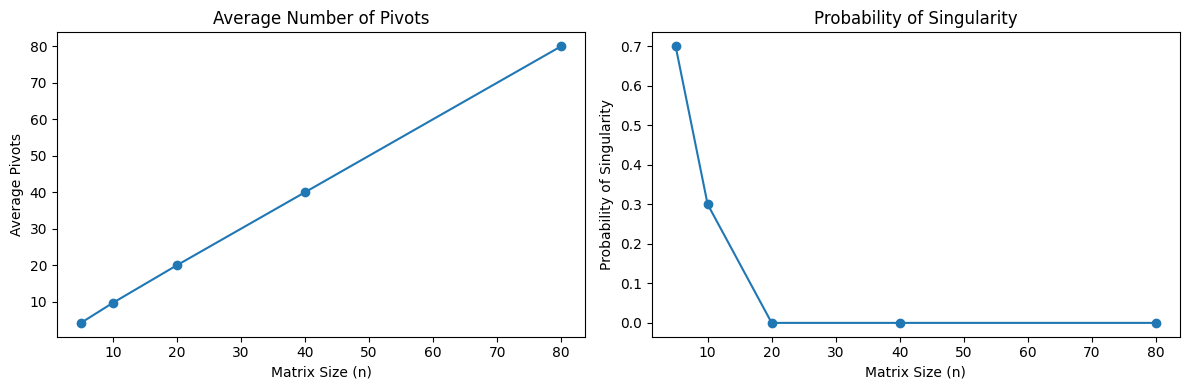

In [14]:
# Code cell
import matplotlib.pyplot as plt

nvalues = [5,10,20,40,80]
num = 500
results = []

for n in nvalues:
    avg_pivots, prob_singular = simulate_pivot_probability(num, n)
    results.append((n, avg_pivots, prob_singular))

# Plotting
plt.figure(figsize=(12, 4))

# Plot Average Pivots
plt.subplot(1, 2, 1)
plt.plot([result[0] for result in results], [result[1] for result in results], marker='o')
plt.title('Average Number of Pivots')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Average Pivots')

# Plot Probability of Singularity
plt.subplot(1, 2, 2)
plt.plot([result[0] for result in results], [result[2] for result in results], marker='o')
plt.title('Probability of Singularity')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Probability of Singularity')

plt.tight_layout()
plt.show()


## 4. Application of Cholesky decomposition
#### 4-1-  Cholesky decomposition
In linear algebra, LU decomposition factors a matrix ($\textbf{A} :n \times n$) as the product of a lower triangular matrix ($\textbf{L} :n \times n$) and an upper triangular matrix ($\textbf{U} :n \times n$). The product sometimes includes a permutation matrix ($\textbf{P} :n \times n$) as well.
$$ \textbf{PA} = \textbf{LU} $$
We know that the elements on the main diagonal of the $\textbf{U}$ are the pivots. So $\textbf{U}$ can be decomposed into a diagonal matrix ($\textbf{D} :n \times n$) with elements whose pivots are on the main diagonal and a normalized $\textbf{U}$ matrix.
$$ \textbf{PA} = \textbf{LDU}  $$
if the A is symmetric then we have the Cholesky decomposition :
$$
\mathbf{A}^T=\mathbf{A} \longrightarrow \mathbf{A} =LD^\frac{1}{2}D^\frac{1}{2} L^T= (LD^\frac{1}{2})(LD^\frac{1}{2})^T=L'{L'} ^T
$$
There are various methods for calculating the Cholesky decomposition one of them is $\bold{Cholesky–Banachiewicz}$ algorithm :
$$
A=LL^T=\begin{bmatrix}
    L_{11}& 0 & 0\\
    L_{21} & L_{22} & 0\\
    L_{31}  & L_{32}  & L_{33} 
\end{bmatrix}\begin{bmatrix}
    L_{11}  & L_{21}  & L_{31} \\
    0  & L_{22}  & L_{32} \\
    0 & 0 & L_{33} 
\end{bmatrix}=\begin{bmatrix}
    L_{11}^2  &   & (symmetric) \\
    L_{21}L_{11}  & L_{21}^2+L_{22}^2  &  \\
    L_{31}L_{11}& L_{31}L_{21}+L_{32}L_{22}& L_{33}^2+L_{32}^2+L_{31}^2 
\end{bmatrix}
$$

and therefore the following formulas for the entries of L:

$$
L_{jj}=\sqrt{A_{jj}-\sum_{k=1}^{j-1}L_{jk}^2} \\
\\
L_{i,j}=\frac{\left(A_{ij}-\sum_{k=1}^{j-1}L_{jk}L_{ik}\right)}{L_{jj}} \  \ for \ \ i>j
$$

> Use this algorithm to write a function that takes a matrix and gives its cholesky decomposition. also print the output for the following matrix :
$$
\mathbf{C}=
\begin{bmatrix}
    1 & 0.7 \\
    0.7 & 1
\end{bmatrix}
$$ 


> then use np.linalg.cholesky to check your answer 

In [15]:
# Code cell
def custom_cholesky(A):
    n = A.shape[0]
    L = np.zeros_like(A, dtype=float)

    for i in range(n):
        for j in range(i+1):
            if j == i:
                L[i, j] = np.sqrt(A[i, i] - np.sum(L[i, :]**2))
            else:
                L[i, j] = (A[i, j] - np.sum(L[i, :] * L[j, :])) / L[j, j]

    return L

C = np.array([[1,0.7],[0.7,1]])

L_custom = custom_cholesky(C)
L_numpy = np.linalg.cholesky(C)

# results
print("Original Matrix A:")
print(C)
print("\nCholesky Decomposition (Custom Function):")
print(L_custom)
print("\nCholesky Decomposition (numpy.linalg.cholesky):")
print(L_numpy)

Original Matrix A:
[[1.  0.7]
 [0.7 1. ]]

Cholesky Decomposition (Custom Function):
[[1.         0.        ]
 [0.7        0.71414284]]

Cholesky Decomposition (numpy.linalg.cholesky):
[[1.         0.        ]
 [0.7        0.71414284]]


#### 4-2-  Using Cholesky to generate correlated random numbers

The co-variance Matrix of any random vector Y
 is given as $\mathbf{E}(YY^T)$
, where Y
 is a random column vector of size n×1
. Now take a random vector, X
, consisting of uncorrelated random variables with each random variable, $X_i$
, having zero mean and unit variance 1
. Since $X_i$
's are uncorrelated random variables with zero mean and unit variance, we have $\mathbf{E}(X_i X_j^T)=δ_{ij}$
. Hence,
$$
\mathbf{E}(XX^T)=I
$$
To generate a random vector with a given covariance matrix $\mathbf{C}$
, look at the Cholesky decomposition of $C$
 i.e. $\mathbf{C}=LL^T$
 
Now look at the random vector $Z=LX$ :
$$
\mathbf{E}(ZZ^T)=\mathbf{E}\left((LX)(LX)^T\right)=L\mathbf{E}(XX^T)L^T =LL^T=\mathbf{C}
$$
Hence, the random vector $\mathbf{Z}$
 has the desired co-variance matrix, $\mathbf{C}$

 >Make the covarience matirx of $C$
  $$
\mathbf{C}=
\begin{bmatrix}
    1 & 0.7 \\
    0.7 & 1
\end{bmatrix}
$$ 

 
 >Then we need another matrix with the desired standard deviation in the diagonal  $\Tau$
 $$
\mathbf{\Tau}=
\begin{bmatrix}
    1 & 0 \\
    0 & 2
\end{bmatrix}
$$ 
>Then find the cholesky decomposition of $C$


In [16]:
# Code cell

C = np.array([[1,.7],[.7,1]])
L = custom_cholesky(C)
T = np.array([[1,0],[0,2]])

>Now  generate values for 2 independent random variables and put them in  2*1000 matrix $X$ (1000 samples)

you can use np.random.normal ( generates iid random variables each time )

In [17]:
# Code cell

X = np.vstack((np.random.normal(0, 1, 1000), np.random.normal(0, 1, 1000)))

>then calculate $\mathbf{Z}=\Tau L X$ and then plot Z[1] in base of Z[0] and X[1] in base of X[0] 

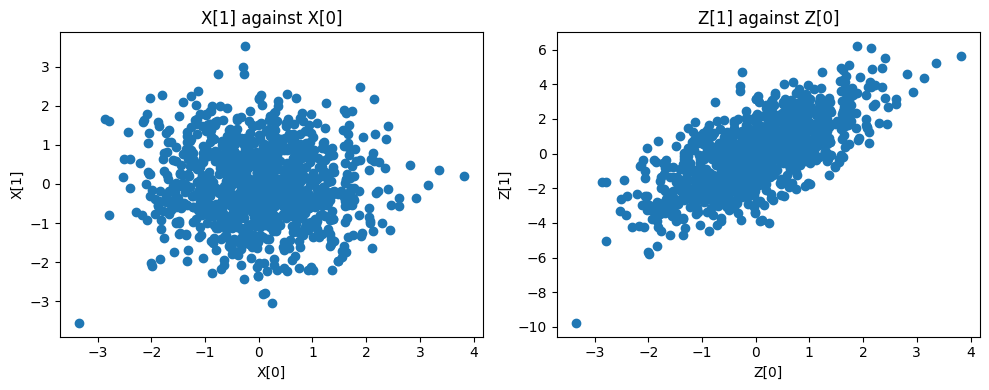

In [18]:
# Code cell

Z = np.matmul(T, np.matmul(L,X))

plt.figure(figsize=(10,4))

def plott(num,A):
    if num == 1:
        str1 = "X[1]"
        str2 = "X[0]"
    elif num == 2:
        str1 = "Z[1]"
        str2 = "Z[0]"

    plt.subplot(1, 2, num)
    plt.scatter(A[0], A[1])
    plt.title(str1+' against '+str2)
    plt.xlabel(str2)
    plt.ylabel(str1)

plott(1,X)
plott(2,Z)

plt.tight_layout()
plt.show()

>now  check the correlation in generated samples with using np.correlate

In [22]:
# Code cell
C_numpy = np.correlate(Z[0], Z[1])
print("Correlation (numpy.correlate):",C_numpy)

C_matrix = np.round(np.corrcoef(Z),decimals=1)
print('covariance matrix =\n' ,C_matrix)

Correlation (numpy.correlate): [1423.89244348]
covariance matrix =
 [[1.  0.7]
 [0.7 1. ]]


## 5. Graphs (bonus)

I suggest running this question's code cells in google colab to install the $\textbf{PyGSP}$ package by  simply running the following code cell

In [20]:
!pip install pygsp


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip



<!-- ![]( graph.png) -->
<div style="text-align:center">
    <img src="graph.png" alt="Image" />
</div> 


For the directed graph above the adjacency matrix is : 
$
A = \begin{bmatrix}
    0  & 1  & 1 & 0\\
    -1  & 0  & 1 & 1 \\
    -1 & -1 & 0 & 1 \\
    0  & -1  & -1 & 0
\end{bmatrix}
$ 

If we change the nodes numbering, the properties of the graph don't change yet the adjacency matrix changes. 


In [2]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
import cv2


#### 5-1-  Introduction to graphs 
>construct the permutation matrix $\textbf{P}$ by modifying the Identity matrix. then use it to number the graph's nodes in reverse order

In [3]:
# Code cell
A = [[0,1,1,0],[-1,0,1,1],[-1,-1,0,1],[0,-1,-1,0]]
P2= [[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]]
A_modified = np.matmul(P2,np.matmul(A,P2))
print(A_modified)

[[ 0 -1 -1  0]
 [ 1  0 -1 -1]
 [ 1  1  0 -1]
 [ 0  1  1  0]]


In [4]:
# Evaluation Cell
assert A_modified.all() == np.matrix('0 -1 -1 0; 1 0 -1 -1; 1 1 0 -1; 0 1 1 0').all(), "wrong!"

#### 5-2-  Graph image processing  

Inpainting is a classical signal processing problem where we wish to fill in the missing values in a
partially observed signal. This is here done in the context of image processing for inferring missing pixel values in
an image. The signal in the image is considered to be the image matrix flattened while the image is modeled as a 2D grid graph.
Inpainting for an image can be formulated as below:

$$(M + \alpha L)x = y$$

where y is a partially observed graph signal (with missing values being 0), and M is a diagonal matrix that satisfies:
 $$ M(i, i)=   \left\{
\begin{array}{ll}
      1, & if & y(i) & is & observed, \\
      0, & if & y(i) & is & not & observed, \\
\end{array} 
\right.  $$

The Equation tries to find an x that nearly matches the observed values in y, and at the same time
being smooth on the graph (the image here). The regularisation parameter α controls the trade-off between the data fidelity term and the
smoothness prior. The solution can therefore be considered as an inpainted version of the partially observed signal.

>Use the cv2 package to load a grayscale version of the cameraman image with a relatively low resolution, 64 by 64, then display the image using matplotlib.pyplot

- do not forget to convert RGB to gray to reduce the 3 color channels to one

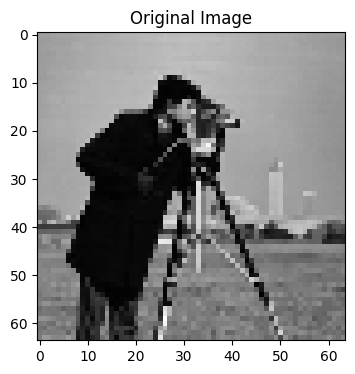

In [5]:
# Code cell
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('cameraman.jpg')
# grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Resize to 64x64
small_gray_image = cv2.resize(gray_image, (64, 64))
plt.figure(figsize=(10, 4))
plt.title("Original Image")
plt.imshow(small_gray_image, cmap='gray')
plt.show()


>Now flatten the image matrix to get the signal\
>Then, construct the diagonal matrix M which has its diagonal 0 except for $p = 50%$ of its elements that are randomly set to 1\
>At last, apply the observasion matrix M to the signal and construct y 

In [6]:
# Code cell

def create_y_M(small_gray_image,p):

    original_signal = small_gray_image.flatten()


    n = 64 * 64 
    M = np.zeros((n, n))
    num_ones = int(p * n) 
    def generate_unique_indices(n,num_ones):
   
        pairs = []
        for _ in range(num_ones):
            num1 = np.random.randint(0, n)
            pairs.append((num1))

        return pairs

    indice = generate_unique_indices(n,num_ones)

    M[indice, indice] = 1

    y = np.matmul(M,original_signal)
    return y , M

p = 0.5
y, M = create_y_M(small_gray_image,p)


In [7]:
# do not edit this cell 
G = graphs.Grid2d(64,64)
L = G.L


>To get x, apply the $\textbf{Cholesky decomposition}$ to ( $M+\alpha L$ ) and then solve the stated equation applying np.linalg.inv() to the two terms multiplied by x ( note that L is given by the code cell above )
- check the soloution with "np.linalg.solve()"

alpha =  0.1  P =  0.5
Correct,Cholesky decomposition succeed. x_solve == x_inv


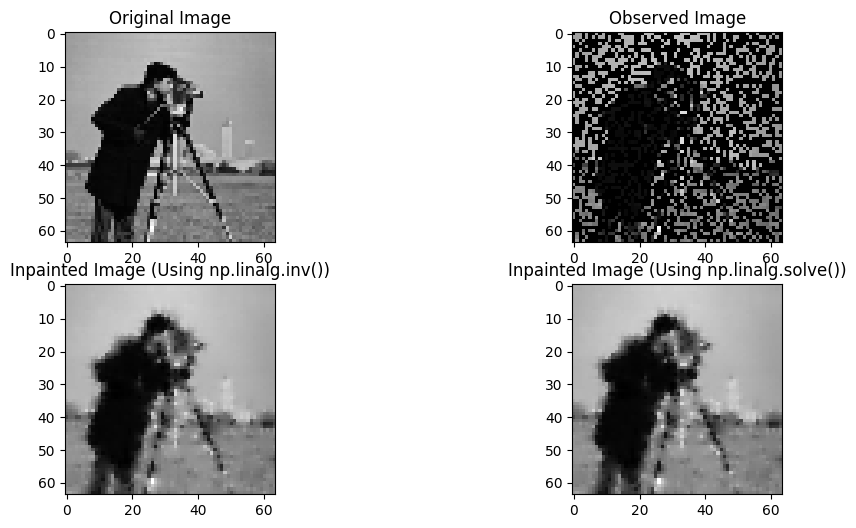

In [8]:
# Code cell

alpha = 0.1

def fff(M,alpha,L,y):
    
    # Construct the matrix (M + αL)
    M_alpha_L = M + alpha * L

    # Cholesky decomposition
    R = np.linalg.cholesky(M_alpha_L)
    # R = custom_cholesky(M_alpha_L)
    
    # Solve the equation using np.linalg.inv()
    x_inv = np.linalg.inv(R.T) @ np.linalg.inv(R) @ y

    # Check the solution using np.linalg.solve()
    x_solve = np.linalg.solve(M_alpha_L, y)

    if x_solve.all() == x_inv.all() :
        print("Correct,Cholesky decomposition succeed. x_solve == x_inv")
    else:
        print("Not correctوCholesky decomposition failed. x_solve != x_inv")

    plt.figure(figsize=(12, 6))
    plt.subplot(221)
    plt.title("Original Image")
    plt.imshow(small_gray_image, cmap='gray')

    observed_image = y.reshape(64, 64)
    plt.subplot(222)
    plt.title("Observed Image")
    plt.imshow(observed_image, cmap='gray')

    inpainted_image_inv = x_inv.reshape(64, 64)
    plt.subplot(223)
    plt.title("Inpainted Image (Using np.linalg.inv())")
    plt.imshow(inpainted_image_inv, cmap='gray')

    inpainted_image_invـlinalg = x_solve.reshape(64, 64)
    plt.subplot(224)
    plt.title("Inpainted Image (Using np.linalg.solve())")
    plt.imshow(inpainted_image_invـlinalg, cmap='gray')
    plt.show()

    return

print("alpha = ",alpha," P = ",p)
fff(M,alpha,L,y)





>For values of alpha 0.001 , 0.1 , 10 and p values 50 , 75 display the original, the damaged and the Inpainted image in subplots

alpha =  0.001  P =  0.5
Correct,Cholesky decomposition succeed. x_solve == x_inv


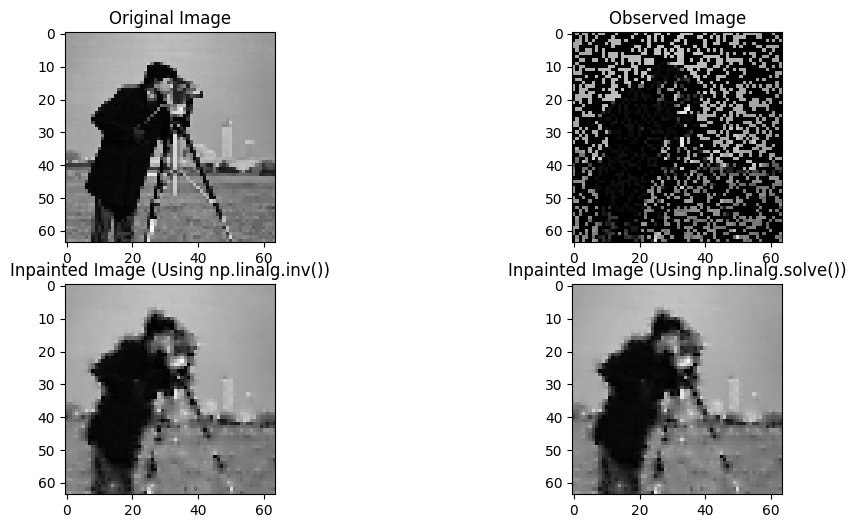

alpha =  0.1  P =  0.5
Correct,Cholesky decomposition succeed. x_solve == x_inv


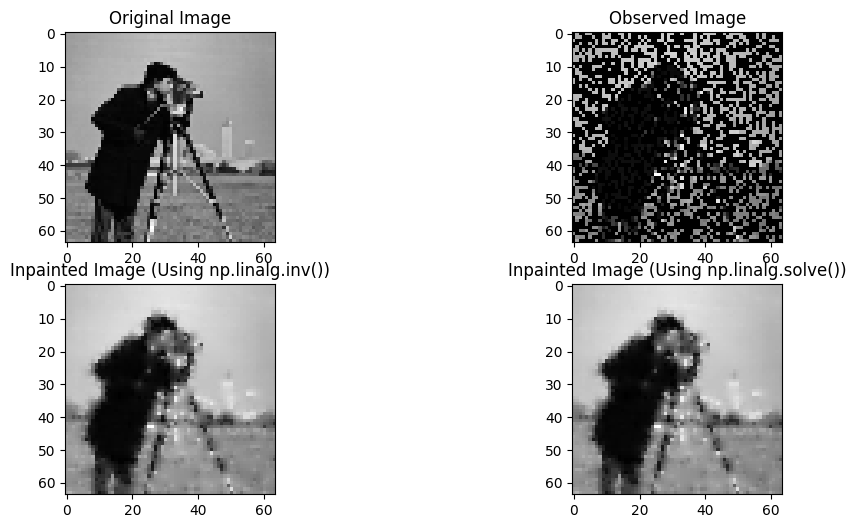

alpha =  10  P =  0.5
Correct,Cholesky decomposition succeed. x_solve == x_inv


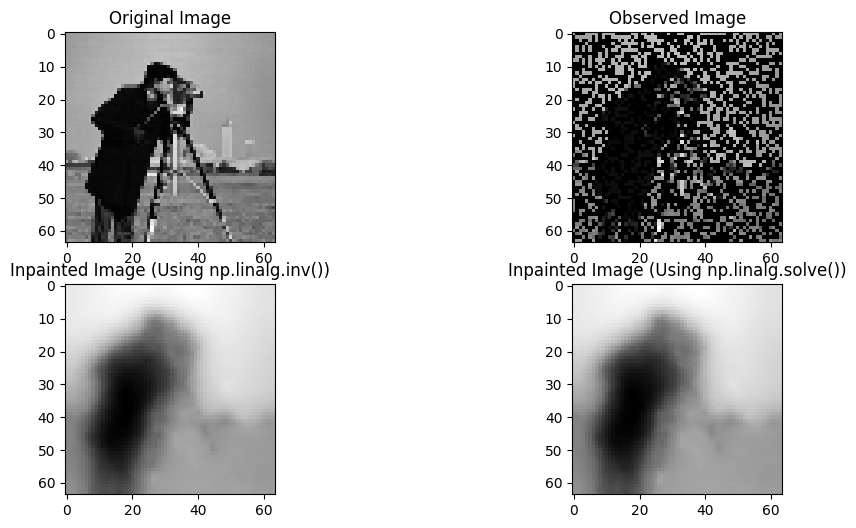

alpha =  0.001  P =  0.75
Correct,Cholesky decomposition succeed. x_solve == x_inv


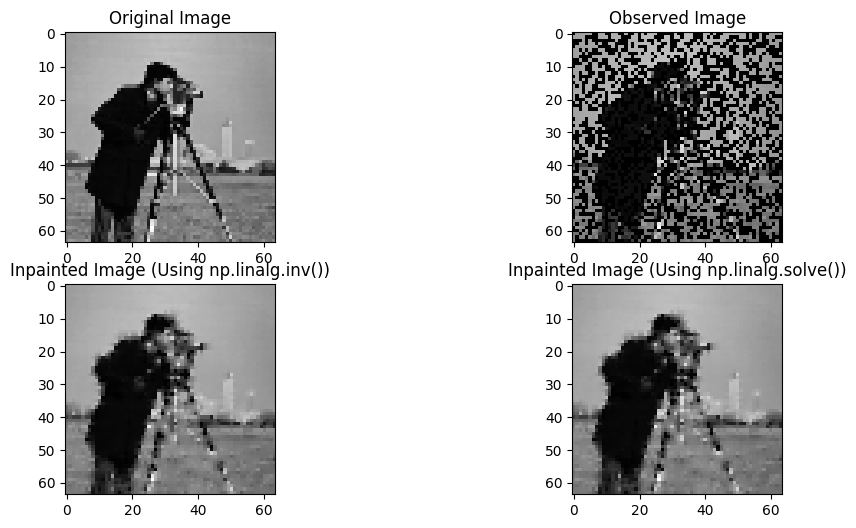

alpha =  0.1  P =  0.75
Correct,Cholesky decomposition succeed. x_solve == x_inv


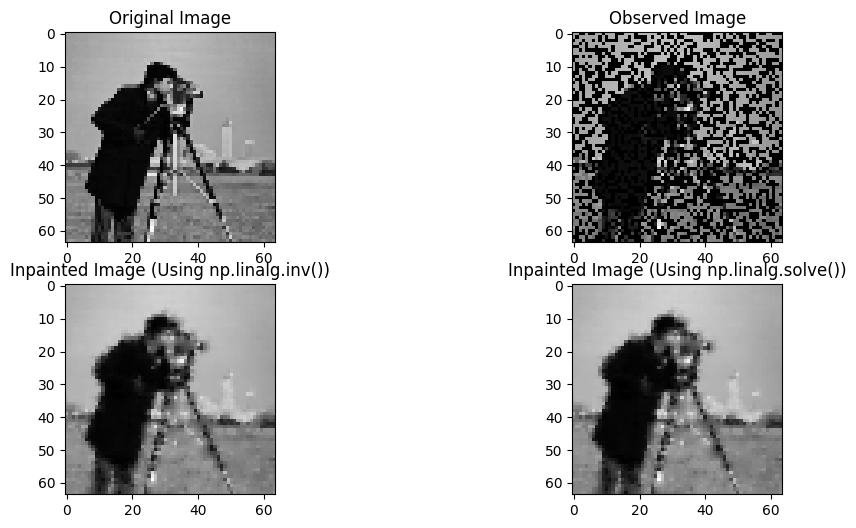

alpha =  10  P =  0.75
Correct,Cholesky decomposition succeed. x_solve == x_inv


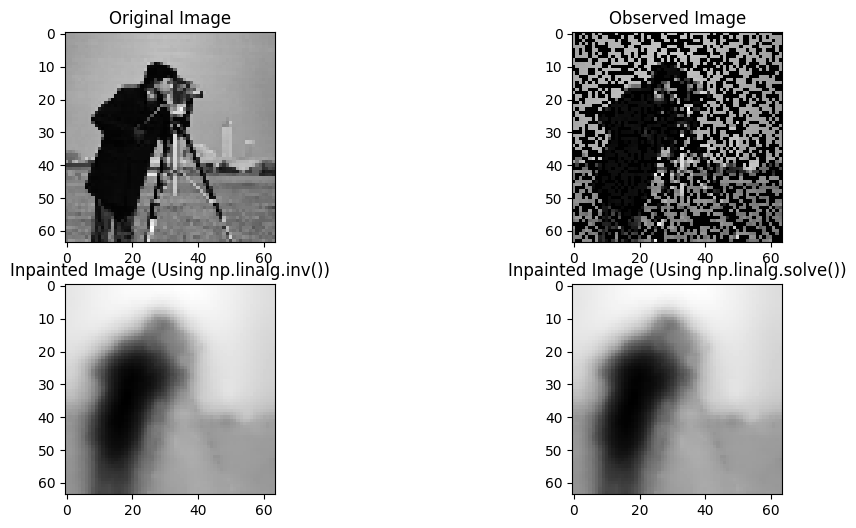

In [9]:
# Code cell
alpha=0.001
p = 0.5
print("alpha = ",alpha," P = ",p)
y, M = create_y_M(small_gray_image, p)
fff(M, alpha, L, y)

alpha=0.1
p = 0.5
print("alpha = ",alpha," P = ",p)
y, M = create_y_M(small_gray_image, p)
fff(M, alpha, L, y)

alpha=10
p = 0.5
print("alpha = ",alpha," P = ",p)
y, M = create_y_M(small_gray_image, p)
fff(M, alpha, L, y)

alpha=0.001
p = 0.75
print("alpha = ",alpha," P = ",p)
y, M = create_y_M(small_gray_image, p)
fff(M, alpha, L, y)

alpha=0.1
p = 0.75
print("alpha = ",alpha," P = ",p)
y, M = create_y_M(small_gray_image, p)
fff(M, alpha, L, y)

alpha=10
p = 0.75
print("alpha = ",alpha," P = ",p)
y, M = create_y_M(small_gray_image, p)
fff(M, alpha, L, y)
